In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

/var/folders/qj/v5vpz3c169506rzn5tfshb0h0000gn/T/ipykernel_56137/1278398597.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv("University_Data.csv")
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


The above columns correspond to:

Apps Number of applications received

Accept Number of applications accepted

Enroll Number of new students enrolled

Top10perc Pct. new students from top 10% of H.S. class

Top25perc Pct. new students from top 25% of H.S. class

F.Undergrad Number of fulltime undergraduates

P.Undergrad Number of parttime undergraduates

Outstate Out-of-state tuition

Room.Board Room and board costs

Books Estimated book costs

Personal Estimated personal spending

PhD Pct. of faculty with Ph.D.’s

Terminal Pct. of faculty with terminal degree

S.F.Ratio Student/faculty ratio

perc.alumni Pct. alumni who donate

Expend Instructional expenditure per student

Grad.Rate Graduation rate

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

No missing values! More info:

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Adding Acceptance Rate and Total Cost (which assumes out of state *limitation of data*) and name for names column, and binary encoding the private field:

In [7]:
df['Accept.Rate'] = df['Accept'] / df['Apps']
df["Total.Cost"] = df["Outstate"] + df["Room.Board"] + df["Books"] + df["Personal"]
df = df.rename(columns={'Unnamed: 0': 'Name'})
df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})
df.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Accept.Rate,Total.Cost
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,...,450,2200,70,78,18.1,12,7041,60,0.742169,13390
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,...,750,1500,29,30,12.2,16,10527,56,0.880146,20980
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,...,400,1165,53,66,12.9,30,8735,54,0.768207,16565
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,...,450,875,92,97,7.7,37,19016,59,0.836930,19735
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,...,800,1500,76,72,11.9,2,10922,15,0.756477,13980


<Axes: >

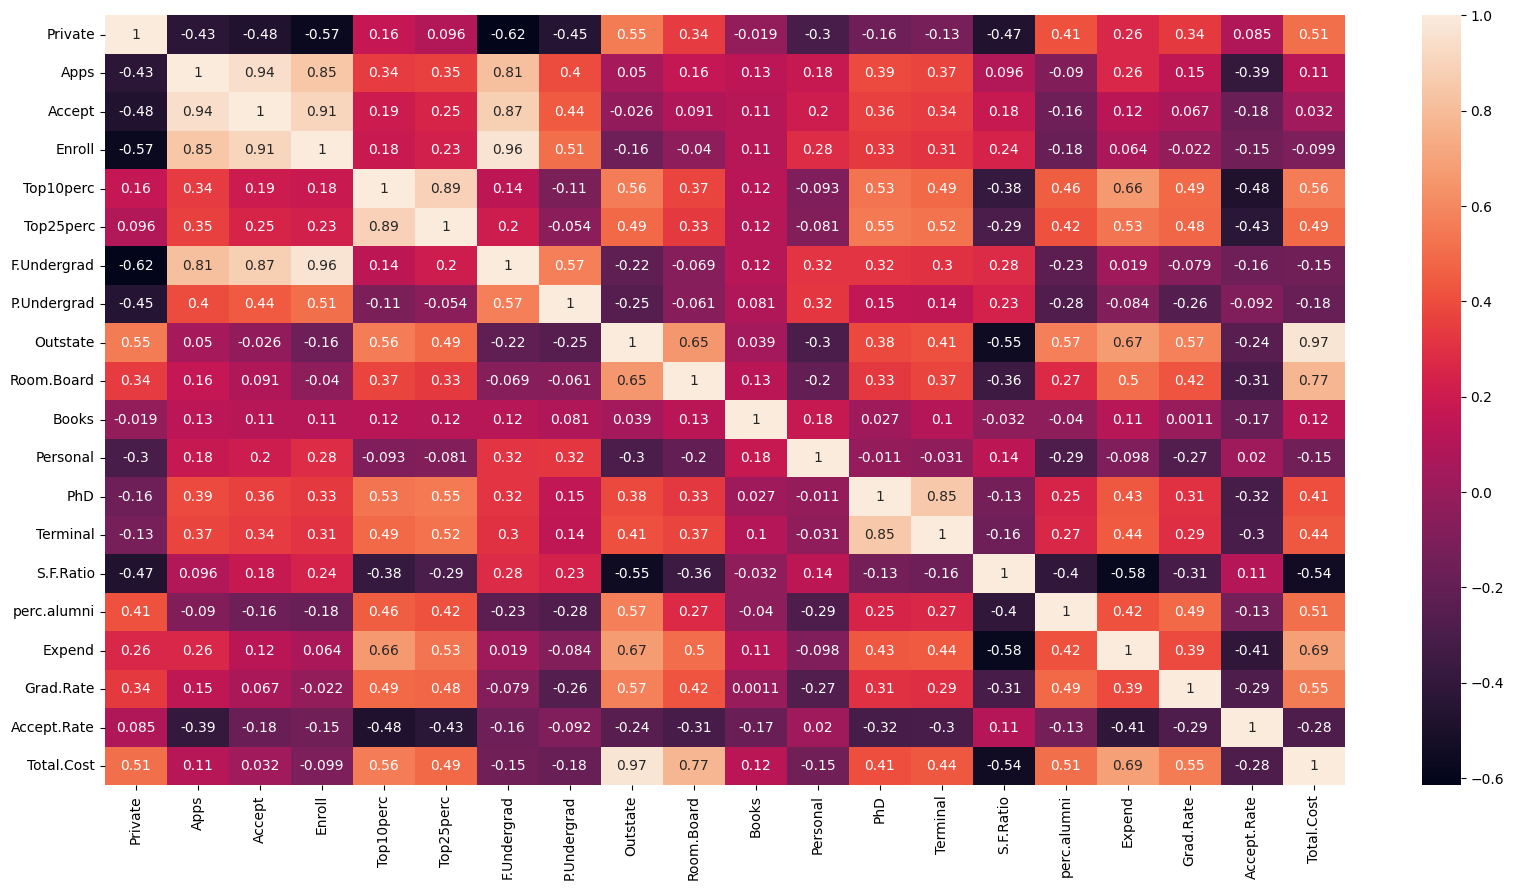

In [8]:
plt.figure(figsize=(20,10))
numeric_df = df.select_dtypes(include=[float, int])
c = numeric_df.corr()
sns.heatmap(c,annot=True)

Top 10 and Top 25% in highschool are highly correlated so we can remove one of those, we will remove 25% since it is less constraining.

Percentage of faculty with a PhD and terminal degree are highly correlated, so we will remove terminal since it is less constraining.

Total cost better encompasses out of state costs and highly correlates with room and board and tuition, so we will remove the other cost variables as well.

Acceptance percentage captures the important takeaway from Apps and Accept so those can be removed as well.

Enroll is highly correlated with F.Undergrad and can also be removed.

Since our student is looking for full time undergraduate we will remove the part time numbers and this is less relevant.

Because Student Faculty ratio and expenditure for student are highly correlated, but Student-Faculty ratio is more tangible for the purposes of our user inputs, Expend will be removed.

Alumni percentage to donate to school is not very relevant and will be removed to avoid noise.

In [9]:
columns_to_drop = ["Outstate", "Room.Board", "Books", "Personal", "Terminal", "Apps", "Accept", "Top25perc", "Enroll", "P.Undergrad", "Expend", "perc.alumni"]

df_clean = df.drop(columns=columns_to_drop)

df_clean.head()

,Name,Private,Top10perc,F.Undergrad,PhD,S.F.Ratio,Grad.Rate,Accept.Rate,Total.Cost
0,Abilene Christian University,1,23,2885,70,18.1,60,0.742169,13390
1,Adelphi University,1,16,2683,29,12.2,56,0.880146,20980
2,Adrian College,1,22,1036,53,12.9,54,0.768207,16565
3,Agnes Scott College,1,60,510,92,7.7,59,0.836930,19735
4,Alaska Pacific University,1,16,249,76,11.9,15,0.756477,13980


Another look:

<Axes: >

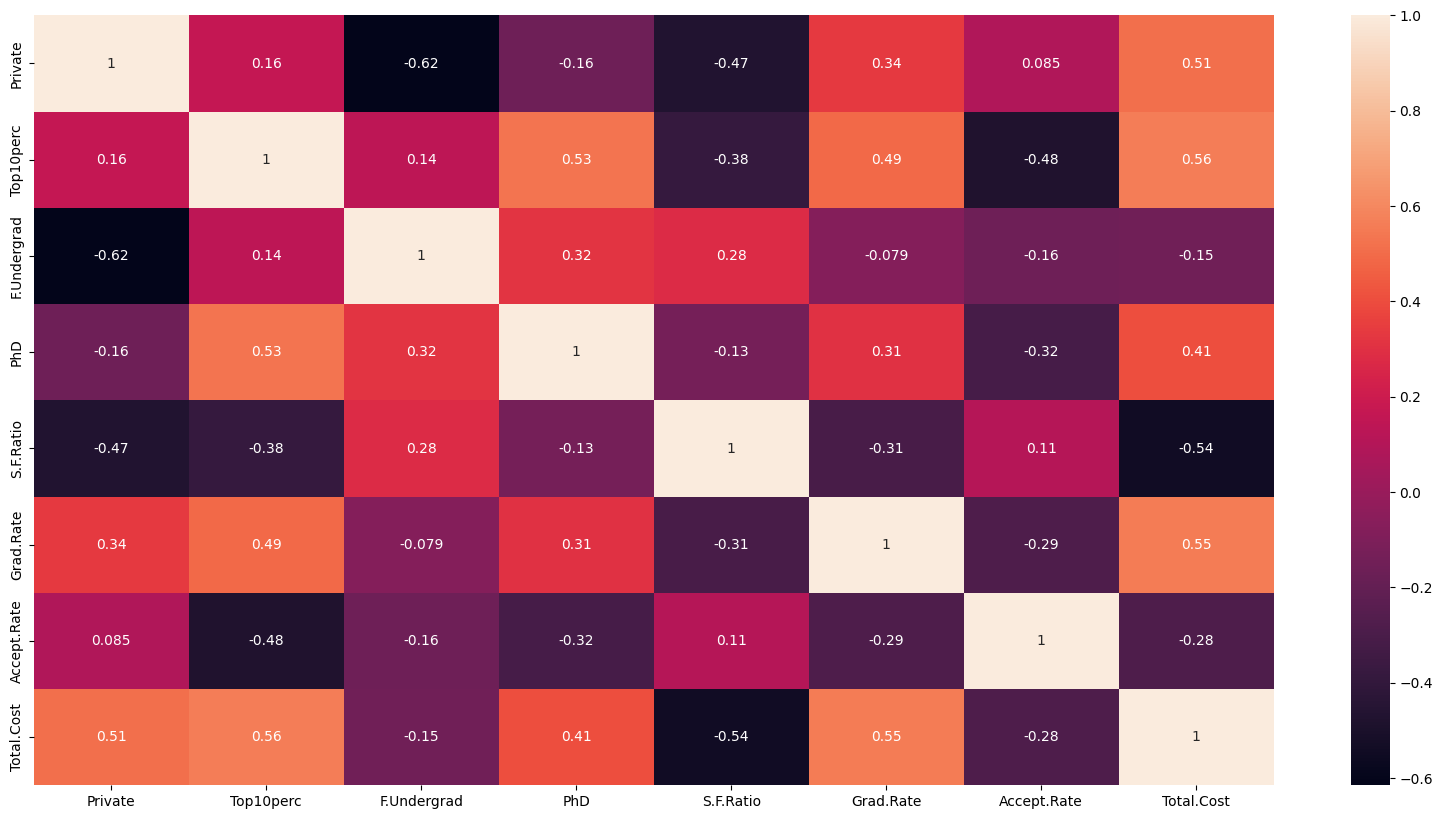

In [10]:
plt.figure(figsize=(20,10))
numeric_df_clean = df_clean.select_dtypes(include=[float, int])
c_clean = numeric_df_clean.corr()
sns.heatmap(c_clean ,annot=True)

In [11]:
df_clean.describe()

,Private,Top10perc,F.Undergrad,PhD,S.F.Ratio,Grad.Rate,Accept.Rate,Total.Cost
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000,777.000000,777.000000
mean,0.727156,27.558559,3699.907336,72.660232,14.089704,65.46332,0.746928,16688.218790
std,0.445708,17.640364,4850.420531,16.328155,3.958349,17.17771,0.147104,4675.340968
min,0.000000,1.000000,139.000000,8.000000,2.500000,10.00000,0.154486,6604.000000
25%,0.000000,15.000000,992.000000,62.000000,11.500000,53.00000,0.675647,13279.000000
50%,1.000000,23.000000,1707.000000,75.000000,13.600000,65.00000,0.778750,16079.000000
75%,1.000000,35.000000,4005.000000,85.000000,16.500000,78.00000,0.848522,19650.000000
max,1.000000,96.000000,31643.000000,103.000000,39.800000,118.00000,1.000000,29095.000000


Normalizing the features:

In [13]:
feature_cols = ['Private', 'Top10perc', 'F.Undergrad', 'PhD', 'S.F.Ratio', 'Grad.Rate', 'Accept.Rate', 'Total.Cost']

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_clean[feature_cols])

print(df_scaled)


[[ 0.61255305 -0.2585828  -0.16811578 ... -0.31825194 -0.03237234
  -0.70590429]
 [ 0.61255305 -0.6556556  -0.20978848 ... -0.55126184  0.90619263
   0.91855239]
 [ 0.61255305 -0.31530749 -0.54956538 ... -0.66776679  0.14474993
  -0.02637201]
 ...
 [ 0.61255305  0.36538874 -0.18709543 ... -0.95902917  1.13109661
  -0.89681541]
 [ 0.61255305  3.82559456  0.31297696 ...  1.9535946  -3.52210848
   2.65537268]
 [ 0.61255305  0.02504063 -0.14686683 ...  1.9535946  -0.85925768
  -1.36724436]]


Taking Student input and normalizing it:

In [14]:
student_preferences = {
    'Private': 1,
    'Top10perc': 30,
    'F.Undergrad': 2000,
    'PhD': 70,
    'S.F.Ratio': 15,
    'Grad.Rate': 70,
    'Accept.Rate': 0.8,
    'Total.Cost': 18000
}

student_preferences_df = pd.DataFrame([student_preferences])
student_preferences_scaled = scaler.transform(student_preferences_df)

Train nearest neighbours:

In [15]:
model = skl.neighbors.NearestNeighbors(n_neighbors=5)
model.fit(df_scaled)

NearestNeighbors()

Finding nearest neighbours for our example:

In [17]:
distances, indices = model.kneighbors(student_preferences_scaled)

recommended_universities = df_clean.iloc[indices[0]]

print("Recommended Universities:")
print(recommended_universities)

Recommended Universities:
                         Name  Private  Top10perc  F.Undergrad  PhD  \
228            Gordon College        1         25         1151   73   
525           Simpson College        1         27         1116   66   
402         Muskingum College        1         24         1115   73   
227        Gonzaga University        1         31         2523   78   
618  University of Evansville        1         35         2551   60   

     S.F.Ratio  Grad.Rate  Accept.Rate  Total.Cost  
228       14.2         66     0.838279       17870  
525       15.8         70     0.858268       18180  
402       13.4         73     0.831380       18554  
227       14.7         69     0.808059       20450  
618       15.8         77     0.775763       17800  
